In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

print(keras.__version__)

2.7.0
2.7.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [3]:
# Wczytaj dane treningowe i testowe
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
              'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

train = train_set.replace('?', np.nan).dropna()
test = test_set.replace('?', np.nan).dropna()

train_set.head()


/var/folders/3t/bh3b870n50l8_xwgnc5hdq900000gn/T/ipykernel_72324/357239312.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_set = pd.read_csv('Dane/adult/adult.data', sep=", ",header = None)
/var/folders/3t/bh3b870n50l8_xwgnc5hdq900000gn/T/ipykernel_72324/357239312.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_set = pd.read_csv('Dane/adult/adult.test', sep=", ",skiprows = 1, header = None) # Make sure to skip a row for the test set


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Zad.
Zróbmy szybki preprocesing

In [4]:
dataset = pd.concat([train,test])

dataset['wage_class'] = dataset.wage_class.replace({'<=50K.': 0,'<=50K':0, '>50K.':1, '>50K':1})

dataset.drop(["fnlwgt"],axis=1,inplace=True)

dataset.drop(["education"],axis=1,inplace=True)

x = dataset.groupby('native_country')["wage_class"].mean()

d = dict(pd.cut(x[x.index!=" United-States"],5,labels=range(5)))

dataset['native_country'] = dataset['native_country'].replace(d)

dataset = pd.get_dummies(dataset,drop_first=True)

train = dataset.iloc[:train.shape[0]]
test = dataset.iloc[train.shape[0]:]

X_train = train.drop("wage_class",axis=1)
y_train = train.wage_class

X_test = test.drop("wage_class",axis=1)
y_test = test.wage_class


# Zad
Nauczmy model z BatchNormalization

Pamiętaj, że 

* BatchNormalization powinno być dodane przed funkcją katywacji
* ustaw parametr use_bias=False

In [5]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.layers import Activation

from keras.callbacks import History

history = History()
model = Sequential()
model.add(Dense(100, use_bias=False,input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(50, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(10, use_bias=False))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5000      
                                                                 
 batch_normalization_1 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)

2022-06-01 21:21:11.132886: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-01 21:21:11.132982: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
model.compile(loss="binary_crossentropy",optimizer="Adam", metrics=["accuracy"])

In [7]:
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=5)

2022-06-01 21:21:13.582924: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/5


2022-06-01 21:21:13.846248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - ETA: 0s - loss: 0.4645 - accuracy: 0.7866

2022-06-01 21:21:22.967868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


943/943 [==============================] - 11s 11ms/step - loss: 0.4645 - accuracy: 0.7866 - val_loss: 0.5205 - val_accuracy: 0.7543
Epoch 2/5
943/943 [==============================] - 10s 11ms/step - loss: 0.3798 - accuracy: 0.8186 - val_loss: 0.4704 - val_accuracy: 0.7734
Epoch 3/5
943/943 [==============================] - 10s 11ms/step - loss: 0.3753 - accuracy: 0.8191 - val_loss: 0.4772 - val_accuracy: 0.7612
Epoch 4/5
943/943 [==============================] - 10s 11ms/step - loss: 0.3661 - accuracy: 0.8263 - val_loss: 0.5250 - val_accuracy: 0.7811
Epoch 5/5
943/943 [==============================] - 11s 11ms/step - loss: 0.3706 - accuracy: 0.8200 - val_loss: 0.4440 - val_accuracy: 0.7957


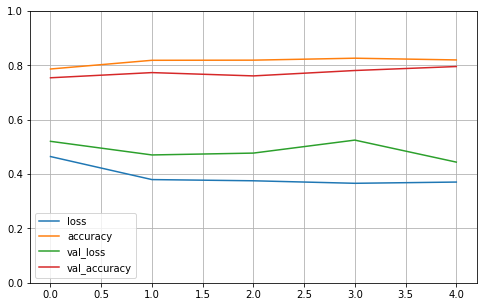

In [8]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [9]:
model.evaluate(X_test,y_test)

471/471 [==============================] - 2s 4ms/step - loss: 0.4440 - accuracy: 0.7957


[0.4440133273601532, 0.7956839799880981]

In [10]:
from sklearn import  metrics
metrics.accuracy_score(y_true= y_test, y_pred= (model.predict(X_test) > 0.5).astype("int32") )

2022-06-01 21:22:08.119866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


0.7956839309428951

# Zad.
Do poniższego modelu dodaj
 
```python
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
```

w każdej warstwie.

Zwizualizuj wyniki:

* porównaj krzywe uczenia
* narysuj granice decyzyjne (dane są w 2D)




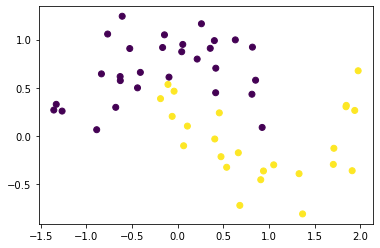

In [11]:
from sklearn.datasets import make_moons
# generate 2d classification dataset
X, y = make_moons(n_samples=100, noise=0.2, random_state=5)
# split into train and test
# n_train = 30
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=2)

n_train=53
X_train, X_test = X[:n_train, :], X[n_train:, :]
y_train, y_test = y[:n_train], y[n_train:]

plt.scatter(X_train[:,0],X_train[:,1], c=y_train)
plt.show()

In [16]:
from keras.callbacks import History


history_Adam = History()
model = Sequential()
model.add(Dense(1000,activation="relu",input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(500,activation="sigmoid"))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(200,activation="sigmoid"))
model.add(BatchNormalization())
model.add(Activation("sigmoid"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])

model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=100, callbacks=[history_Adam])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 1000)              3000      
                                                                 
 batch_normalization_9 (Batc  (None, 1000)             4000      
 hNormalization)                                                 
                                                                 
 activation_9 (Activation)   (None, 1000)              0         
                                                                 
 dense_13 (Dense)            (None, 500)               500500    
                                                                 
 batch_normalization_10 (Bat  (None, 500)              2000      
 chNormalization)                                                
                                                                 
 activation_10 (Activation)  (None, 500)              

2022-06-01 21:29:45.590996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 268ms/step - loss: 0.6092 - accuracy: 0.5849 - val_loss: 0.7010 - val_accuracy: 0.4468
Epoch 2/100
1/2 [==============>...............] - ETA: 0s - loss: 0.2472 - accuracy: 0.9375

2022-06-01 21:29:46.081245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 0s 54ms/step - loss: 0.2573 - accuracy: 0.9057 - val_loss: 0.7118 - val_accuracy: 0.4468
Epoch 3/100
2/2 [==============================] - 0s 46ms/step - loss: 0.2197 - accuracy: 0.9057 - val_loss: 0.7236 - val_accuracy: 0.4468
Epoch 4/100
2/2 [==============================] - 0s 38ms/step - loss: 0.2779 - accuracy: 0.8868 - val_loss: 0.7282 - val_accuracy: 0.4468
Epoch 5/100
2/2 [==============================] - 0s 46ms/step - loss: 0.2471 - accuracy: 0.9245 - val_loss: 0.7228 - val_accuracy: 0.4468
Epoch 6/100
2/2 [==============================] - 0s 42ms/step - loss: 0.2016 - accuracy: 0.9245 - val_loss: 0.7213 - val_accuracy: 0.4468
Epoch 7/100
2/2 [==============================] - 0s 38ms/step - loss: 0.1766 - accuracy: 0.9245 - val_loss: 0.7226 - val_accuracy: 0.4468
Epoch 8/100
2/2 [==============================] - 0s 41ms/step - loss: 0.1795 - accuracy: 0.9245 - val_loss: 0.7228 - val_accuracy: 0.4468
Epoch 9/100
2/2 [===============

2/2 [==============================] - 0s 35ms/step - loss: 0.0360 - accuracy: 1.0000 - val_loss: 1.0891 - val_accuracy: 0.4468
Epoch 61/100
2/2 [==============================] - 0s 35ms/step - loss: 0.0810 - accuracy: 0.9623 - val_loss: 1.1038 - val_accuracy: 0.4468
Epoch 62/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0402 - accuracy: 1.0000 - val_loss: 1.1084 - val_accuracy: 0.4468
Epoch 63/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0493 - accuracy: 0.9811 - val_loss: 1.1241 - val_accuracy: 0.4468
Epoch 64/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0363 - accuracy: 1.0000 - val_loss: 1.1389 - val_accuracy: 0.4468
Epoch 65/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0412 - accuracy: 1.0000 - val_loss: 1.1538 - val_accuracy: 0.4468
Epoch 66/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0361 - accuracy: 1.0000 - val_loss: 1.1718 - val_accuracy: 0.4468
Epoch 67/100
2/2 [========

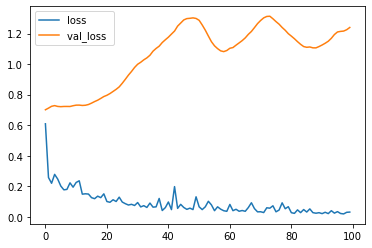

In [19]:
plt.plot(history_Adam.history['loss'], label = "loss")
plt.plot(history_Adam.history['val_loss'], label = "val_loss ")


plt.legend()
plt.show()

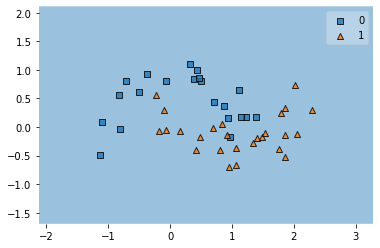

In [20]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, model)
plt.show()

In [2]:
from mlxtend.plotting import plot_decision_regions